<a href="https://colab.research.google.com/github/akr1139/CO542_LAB_06/blob/main/E17285_CO542_LAB_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=14fe748fc58cb2c501546bdd30b08c668e675403b8d046d99a7504673cb75e3b
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

In [3]:
# set data file
df = pd.read_csv("/content/diabetes.csv")
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()
#outcome is a less complex feature
#it can be dropped


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
features = df.drop(columns=["Outcome"], axis=1)

In [7]:
class_names = features.columns
data = features.values

In [8]:
#preprocessing
#creating the feature matrix
mm_scaler = MinMaxScaler()
feature_matrix = mm_scaler.fit_transform(features)

In [9]:
# Initialization of weights
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, feature_matrix.shape[1], sigma=1.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=0)


In [10]:
#train the self-organizing map.
som.pca_weights_init(feature_matrix)
som.train_random(feature_matrix, 1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.21059897072969844


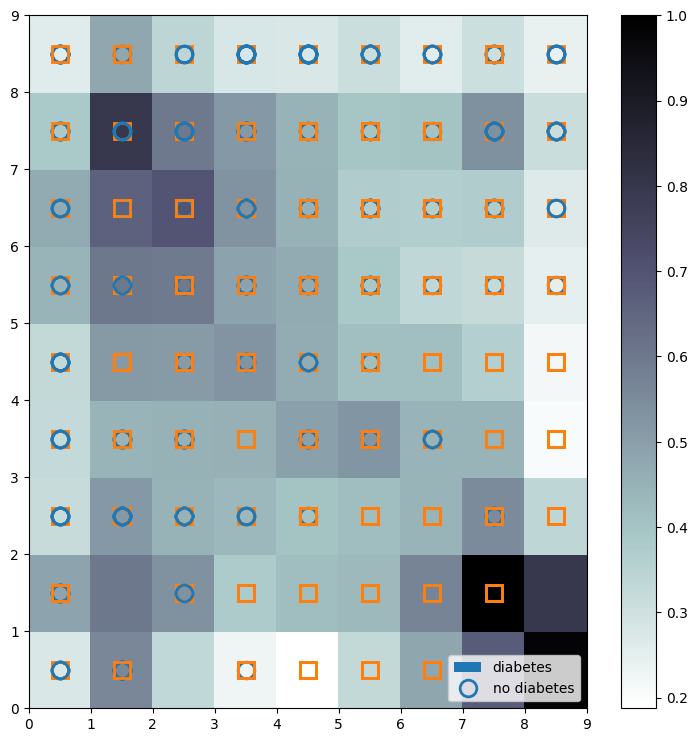

In [11]:
#plot the distance map
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

#Plotting the response for each pattern in the diabetes dataset
#different colors and markers for each label
#only two output labels
#two type of colors and markers
markers = ['o', 's']
colors = ['C0', 'C1']

outcomes = df['Outcome'].values

for cnt, xx in enumerate(feature_matrix):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[outcomes[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[outcomes[cnt]-1], markersize=12, markeredgewidth=2)
plt.legend(["diabetes","no diabetes"])
plt.show()

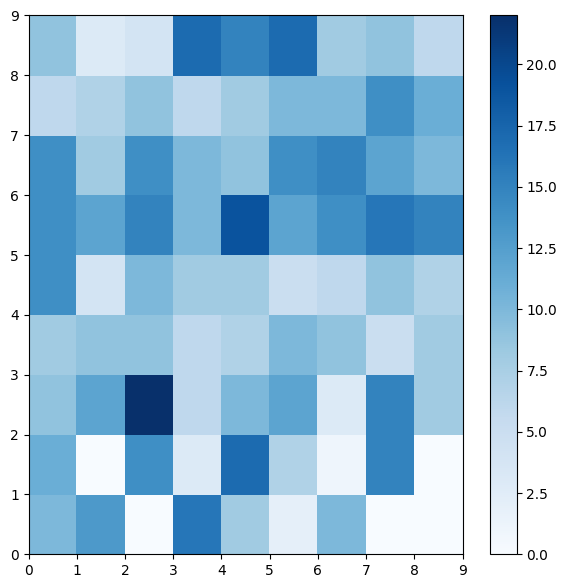

In [12]:
#how often each neuron is activated
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(feature_matrix)
plt.pcolor(frequencies.T, cmap='Blues')
plt.colorbar()
plt.show()

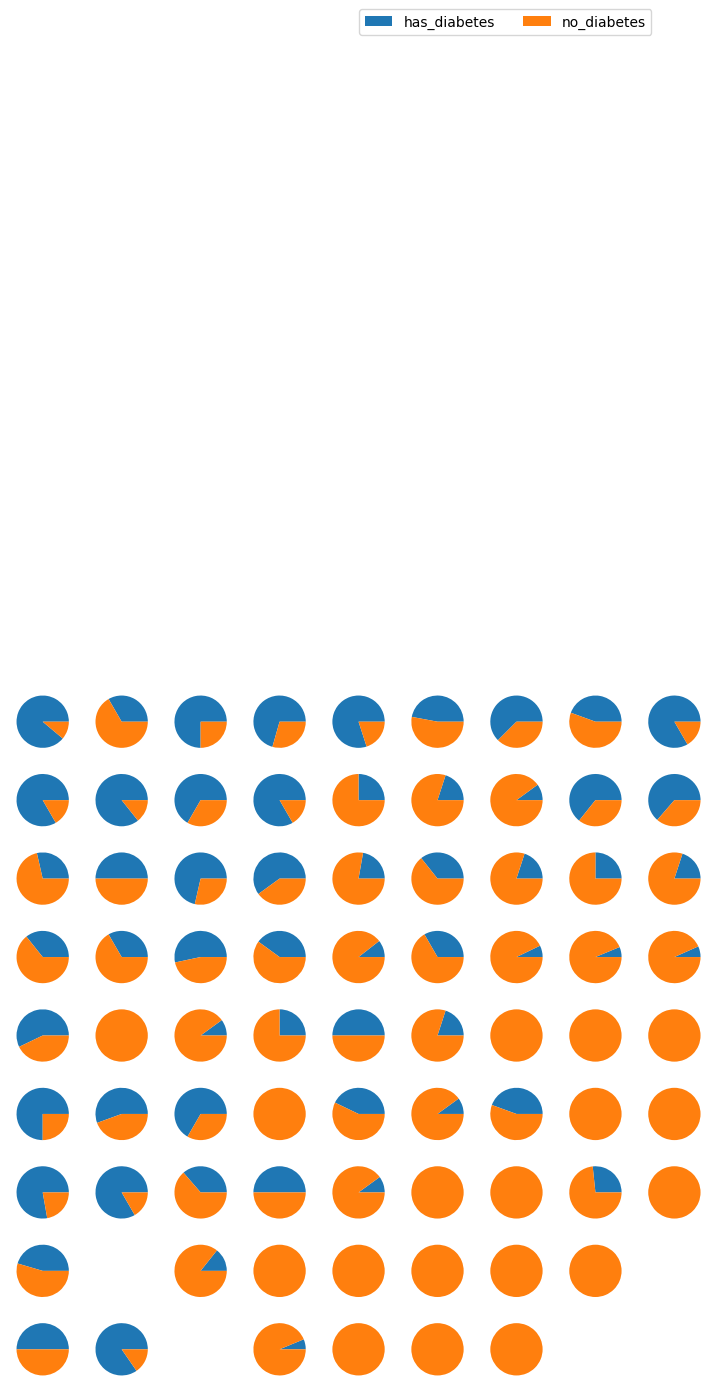

In [13]:
#visualize the proportion of samples per class
label_names = {1:'has_diabetes', 0:'no_diabetes'}
labels_map = som.labels_map(feature_matrix, [label_names[t] for t in outcomes])

fig = plt.figure(figsize=(9, 9))
the_grid = GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(7.5, 11.5), ncol=3)
plt.show()